## Data Loading:

### Context
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

### content
The dataset was provided by the Mexican government ([link](https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico)). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 -- 99 are missing data.

- **sex**: 1 for female and 2 for male.
- **age**: of the patient.
- **classification**: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- **patient type**: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- **pneumonia**: whether the patient already have air sacs inflammation or not.
- **pregnancy**: whether the patient is pregnant or not.
- **diabetes**: whether the patient has diabetes or not.
- **copd**: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- **asthma**: whether the patient has asthma or not.
- **inmsupr**: whether the patient is immunosuppressed or not.
- **hypertension**: whether the patient has hypertension or not.
- **cardiovascular**: whether the patient has heart or blood vessels related disease.
- **renal chronic**: whether the patient has chronic renal disease or not.
- **other disease**: whether the patient has other disease or not.
- **obesity**: whether the patient is obese or not.
- **tobacco**: whether the patient is a tobacco user.
- **usmr**: Indicates whether the patient treated medical units of the first, second or third level.
- **medical unit**: type of institution of the National Health System that provided the care.
- **intubed**: whether the patient was connected to the ventilator.
- **icu**: Indicates whether the patient had been admitted to an Intensive Care Unit.
- **date died**: If the patient died indicate the date of death, and 9999-99-99 otherwise.

[Link to dataset](https://www.kaggle.com/datasets/meirnizri/covid19-dataset)

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/DELL/Downloads/Covid Data.csv')
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


# Getting informed about data:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
data.duplicated().sum()

812049

In [5]:
data.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [6]:
# Data preprocessing:

In [7]:
data['DEATH'] = data['DATE_DIED'].apply(lambda x: 0 if x == '9999-99-99' else 1)

In [8]:
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,7,97,0
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,1,2,2,2,2,2,7,2,0
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,7,97,0
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,7,97,0


In [9]:
def prep_bool(x):
    if x in [97, 98, 99]: # for missing values
        return np.nan
    elif x == 1: # for 'yes' values
        return 1
    elif x == 2: # for 'no' values
        return 0

In [10]:
for col in data.columns:
    if not (col in ['MEDICAL_UNIT', 'DATE_DIED', 'AGE', 'CLASIFFICATION_FINAL', 'DEATH']):
        data[col] = data[col].apply(prep_bool)

In [11]:
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,0,1,1,1,03/05/2020,NaN,1.0,65,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,1
1,0,1,0,1,03/06/2020,NaN,1.0,72,NaN,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,NaN,1
2,0,1,0,0,09/06/2020,1.0,0.0,55,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,1
3,0,1,1,1,12/06/2020,NaN,0.0,53,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN,1
4,0,1,0,1,21/06/2020,NaN,0.0,68,NaN,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,13,0,1,9999-99-99,NaN,0.0,40,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN,0
1048571,1,13,0,0,9999-99-99,0.0,0.0,51,NaN,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,0.0,0
1048572,0,13,0,1,9999-99-99,NaN,0.0,55,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN,0
1048573,0,13,0,1,9999-99-99,NaN,0.0,28,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN,0


In [12]:
data.isna().sum() / data.shape[0] * 100

USMER                    0.000000
MEDICAL_UNIT             0.000000
SEX                      0.000000
PATIENT_TYPE             0.000000
DATE_DIED                0.000000
INTUBED                 81.622106
PNEUMONIA                1.526166
AGE                      0.000000
PREGNANT                50.283957
DIABETES                 0.318337
COPD                     0.286389
ASTHMA                   0.284100
INMSUPR                  0.324631
HIPERTENSION             0.296021
OTHER_DISEASE            0.481129
CARDIOVASCULAR           0.293350
OBESITY                  0.289154
RENAL_CHRONIC            0.286675
TOBACCO                  0.307083
CLASIFFICATION_FINAL     0.000000
ICU                     81.637651
DEATH                    0.000000
dtype: float64

In [13]:
data.drop(columns=['INTUBED', 'PREGNANT', 'ICU'], inplace=True)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [14]:
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,0,1,1,1,03/05/2020,1.0,65,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1
1,0,1,0,1,03/06/2020,1.0,72,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,1
2,0,1,0,0,09/06/2020,0.0,55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
3,0,1,1,1,12/06/2020,0.0,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1
4,0,1,0,1,21/06/2020,0.0,68,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025147,0,13,0,1,9999-99-99,0.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0
1025148,1,13,0,0,9999-99-99,0.0,51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,0
1025149,0,13,0,1,9999-99-99,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0
1025150,0,13,0,1,9999-99-99,0.0,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0


# Data Visualization:

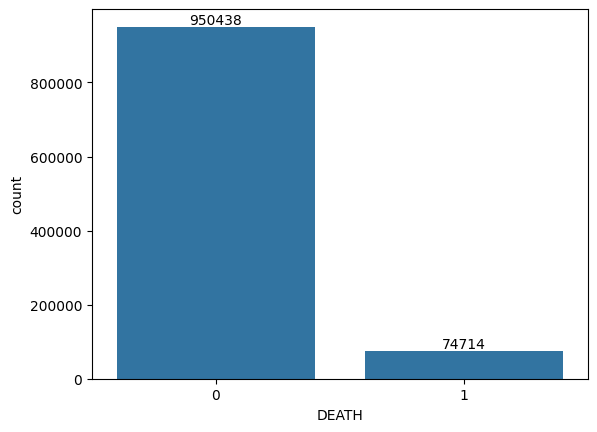

In [15]:
ax = sns.countplot(x='DEATH', data=data)

for container in ax.containers:
    ax.bar_label(container);

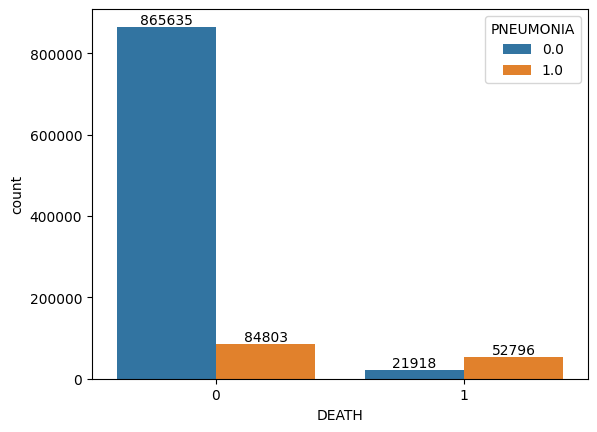

In [16]:
ax = sns.countplot(x='DEATH', data=data, hue='PNEUMONIA')

for container in ax.containers:
    ax.bar_label(container);

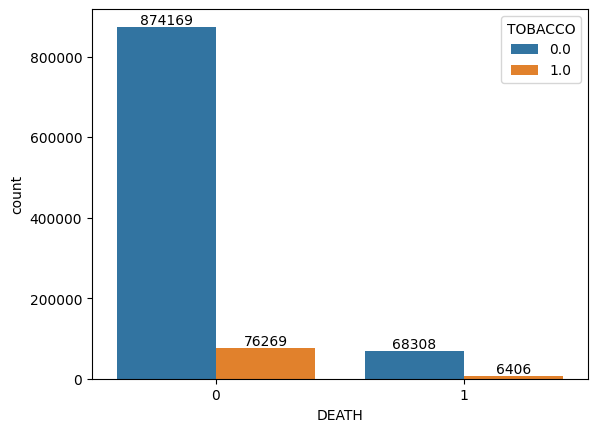

In [17]:
ax = sns.countplot(x='DEATH', data=data, hue='TOBACCO')

for container in ax.containers:
    ax.bar_label(container);

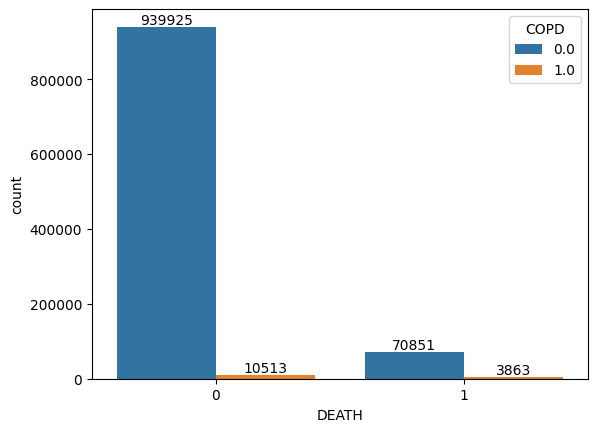

In [18]:
ax = sns.countplot(x='DEATH', data=data, hue='COPD')

for container in ax.containers:
    ax.bar_label(container);

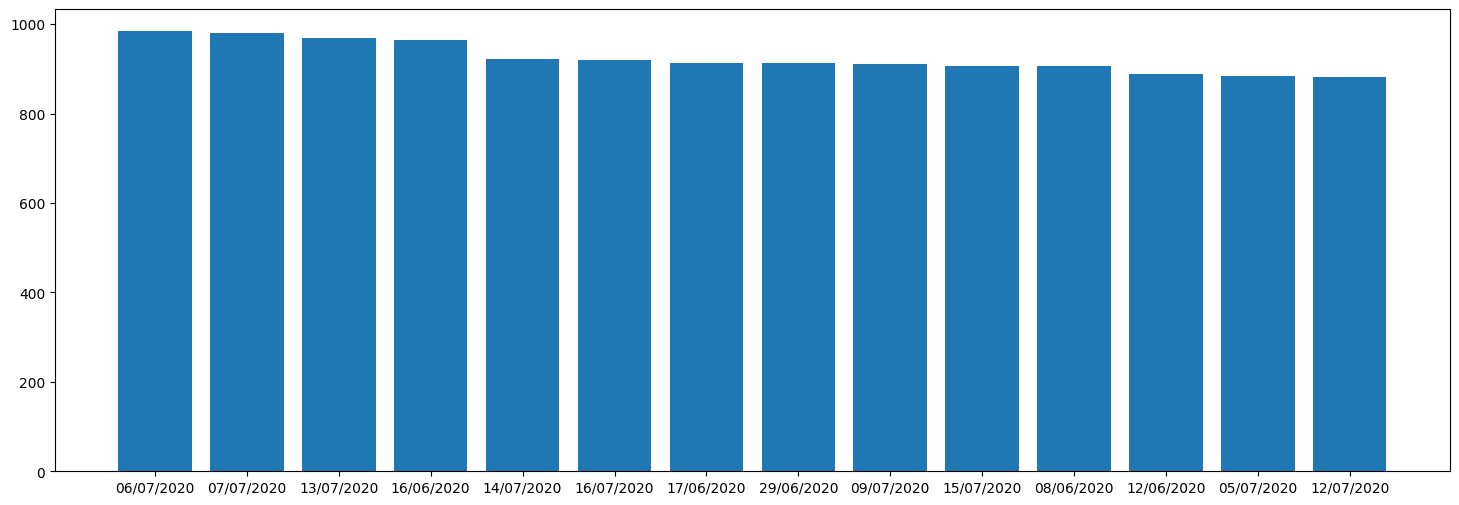

In [19]:
plt.figure(figsize=(18, 6))
plt.bar(x=data['DATE_DIED'].value_counts().head(15).iloc[1:].index,
        height=data['DATE_DIED'].value_counts().head(15).iloc[1:].values);

In [20]:
temp = data['DATE_DIED'].value_counts().iloc[1:].reset_index()

temp.columns = ['Date', 'Count']

temp['Date'] = pd.to_datetime(temp['Date'], dayfirst=True)

temp = temp.sort_values(by='Date').reset_index(drop=True)

print(temp)

          Date  Count
0   2020-01-03      1
1   2020-01-05      1
2   2020-01-07      1
3   2020-01-09      1
4   2020-01-10      1
..         ...    ...
389 2021-04-28     31
390 2021-04-29     30
391 2021-04-30     28
392 2021-05-01     26
393 2021-05-02     23

[394 rows x 2 columns]


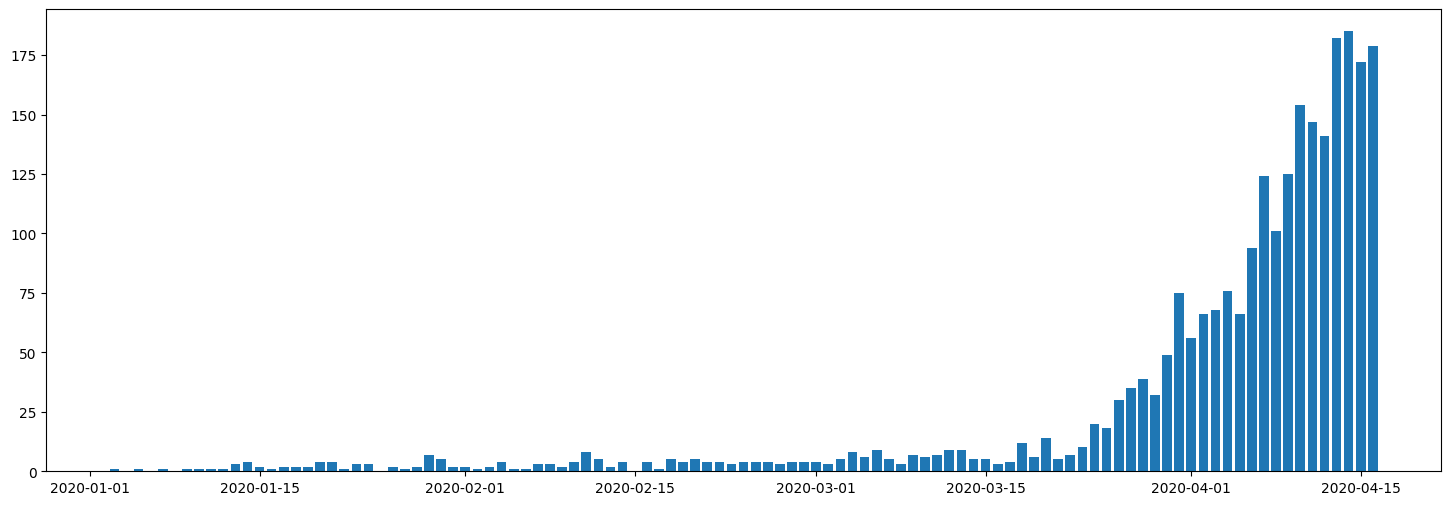

In [21]:
plt.figure(figsize=(18, 6))
plt.bar(x=temp['Date'].iloc[:100],
        height=temp['Count'].iloc[:100]);

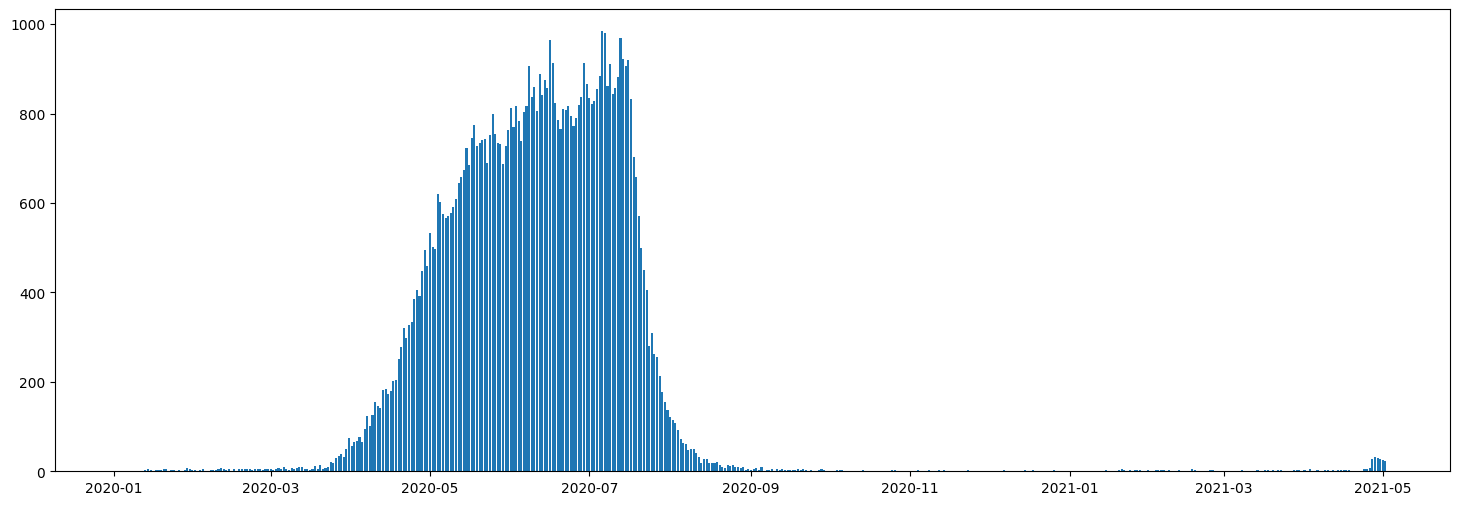

In [22]:
plt.figure(figsize=(18, 6))
plt.bar(x=temp['Date'],
        height=temp['Count']);

# Oversampling & Undersampling:

In [23]:
! pip install imbalanced-learn

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = data.drop(columns=['DEATH', 'DATE_DIED'])
y = data['DEATH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [26]:
print(X_train.shape, y_train.shape, )
print(X_test.shape, y_test.shape)

print(y_train.value_counts()/y_train.shape[0] * 100)

(871379, 17) (871379,)
(153773, 17) (153773,)
DEATH
0    92.709716
1     7.290284
Name: count, dtype: float64


In [27]:
from imblearn.under_sampling import RandomUnderSampler as RUS
from imblearn.over_sampling import RandomOverSampler as ROS
from imblearn.over_sampling import SMOTE

In [28]:
rus = RUS(sampling_strategy=5/9)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print(X_train_rus.shape, y_train_rus.shape)

print(y_train_rus.value_counts()/y_train_rus.shape[0] * 100)

(177872, 17) (177872,)
DEATH
0    64.285554
1    35.714446
Name: count, dtype: float64


In [29]:
ros = ROS(sampling_strategy=2/3)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print(X_train_ros.shape, y_train_ros.shape)

print(y_train_ros.value_counts()/y_train_ros.shape[0] * 100)

(1346421, 17) (1346421,)
DEATH
0    60.00003
1    39.99997
Name: count, dtype: float64


In [30]:
smote = SMOTE(sampling_strategy=2/3)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(X_train_smote.shape, y_train_smote.shape)

print(y_train_smote.value_counts()/y_train_smote.shape[0] * 100)

(1346421, 17) (1346421,)
DEATH
0    60.00003
1    39.99997
Name: count, dtype: float64


# Classification:

In [31]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.linear_model import LogisticRegression

In [32]:
clf1 = DTC(criterion='gini')
clf1.fit(X_train, y_train)

clf2 = DTC(criterion='gini')
clf2.fit(X_train_rus, y_train_rus)

clf3 = DTC(criterion='gini')
clf3.fit(X_train_ros, y_train_ros)

clf4 = DTC(criterion='gini')
clf4.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

In [33]:
clf5 = RFC(n_estimators=20, criterion='gini')
clf5.fit(X_train, y_train)

clf6 = RFC(n_estimators=20, criterion='gini')
clf6.fit(X_train_rus, y_train_rus)

clf7 = RFC(n_estimators=20, criterion='gini')
clf7.fit(X_train_ros, y_train_ros)

clf8 = RFC(n_estimators=20, criterion='gini')
clf8.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_estimators=20)

In [34]:
clf9 = ABC(n_estimators=20)
clf9.fit(X_train, y_train)

clf10 = ABC(n_estimators=20)
clf10.fit(X_train_rus, y_train_rus)

clf11 = ABC(n_estimators=20)
clf11.fit(X_train_ros, y_train_ros)

clf12 = ABC(n_estimators=20)
clf12.fit(X_train_smote, y_train_smote)

AdaBoostClassifier(n_estimators=20)

In [35]:
clf13 = GNB()
clf13.fit(X_train, y_train)

clf14 = GNB()
clf14.fit(X_train_rus, y_train_rus)

clf15 = GNB()
clf15.fit(X_train_ros, y_train_ros)

clf16 = GNB()
clf16.fit(X_train_smote, y_train_smote)

GaussianNB()

In [36]:
clf17 = LogisticRegression(max_iter=700,solver='saga')
clf17.fit(X_train, y_train)

clf18 = LogisticRegression(max_iter=700,solver='saga')
clf18.fit(X_train_rus, y_train_rus)

clf19 = LogisticRegression(max_iter=700,solver='saga')
clf19.fit(X_train_ros, y_train_ros)

clf20 = LogisticRegression(max_iter=700,solver='saga')
clf20.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=700, solver='saga')

In [37]:
clfs = [clf1, clf2, clf3, clf4,
        clf5, clf6, clf7, clf8,
        clf9, clf10, clf11, clf12,
       clf13, clf14, clf15, clf16,
       clf17, clf18, clf19, clf20]

# Model Evaluation:

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef , cohen_kappa_score

In [39]:
for i, clf in enumerate(clfs):
    print(i+1, accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))

1 0.931145259570926
2 0.8966788708030669
3 0.9089632120073095
4 0.9156483908098301
5 0.9341561912689483
6 0.8967113862641686
7 0.9116164736332126
8 0.9190234956721921
9 0.9373297002724795
10 0.909750086165972
11 0.907044799802306
12 0.9039168124443173
13 0.8859552717317084
14 0.8728970625532441
15 0.8736709305274658
16 0.8782230950817114
17 0.9378369414656669
18 0.9042679794242162
19 0.9007107879796843
20 0.8999434230976829


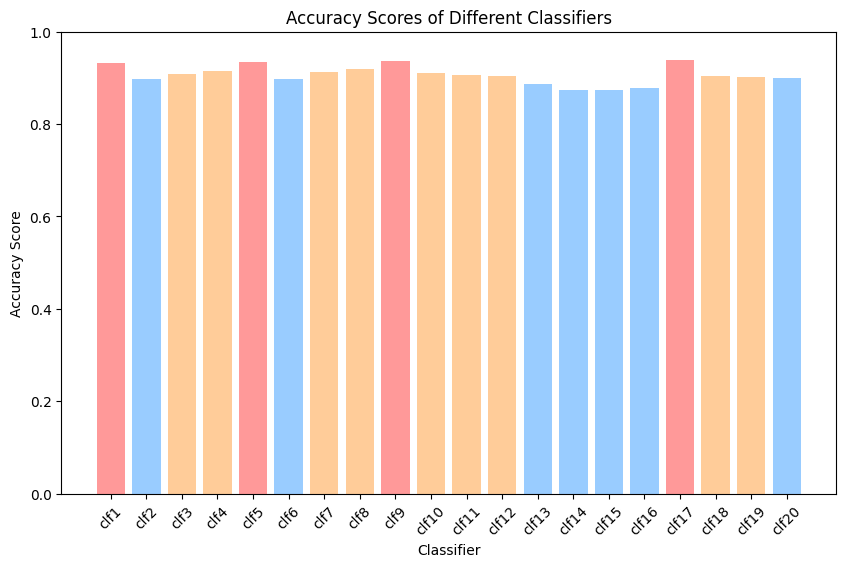

In [40]:
accuracy_scores = [accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)) for clf in clfs]
colors = ['#FF9999' if score > 0.93 else '#FFCC99' if score > 0.9 else '#99CCFF' for score in accuracy_scores]
plt.figure(figsize=(10, 6))
plt.bar(range(1, 21), accuracy_scores, color=colors)
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Classifiers')
plt.xticks(range(1, 21), [f'clf{i+1}' for i in range(20)], rotation=45)
plt.ylim(0, 1)
plt.show()

In [41]:
for i, clf in enumerate(clfs):
    print(i+1, f1_score(y_true=y_test, y_pred=clf.predict(X_test)))

1 0.4805729984301413
2 0.5342674561763499
3 0.5300614320722414
4 0.5345724640281316
5 0.5065067992396548
6 0.5516443189837685
7 0.5464375104288336
8 0.5507612381845732
9 0.5430319123713785
10 0.5820383086375135
11 0.5778998346326483
12 0.566168482250345
13 0.4996719066503096
14 0.4903387311272784
15 0.49297906770371147
16 0.5107127926421405
17 0.5063264989929247
18 0.5725485641278782
19 0.5676257362936112
20 0.5623257666268419


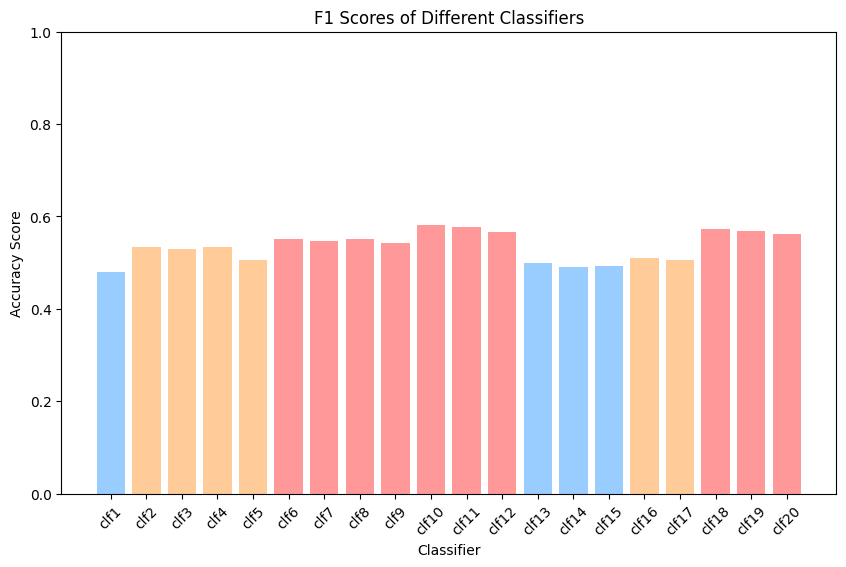

In [42]:
f1_scores = [f1_score(y_true=y_test, y_pred=clf.predict(X_test)) for clf in clfs]
colors = ['#FF9999' if score > 0.54 else '#FFCC99' if score > 0.5 else '#99CCFF' for score in f1_scores]
plt.figure(figsize=(10, 6))
plt.bar(range(1, 21), f1_scores, color=colors)
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('F1 Scores of Different Classifiers')
plt.xticks(range(1, 21), [f'clf{i+1}' for i in range(20)], rotation=45)
plt.ylim(0, 1)
plt.show()

In [43]:
for i, clf in enumerate(clfs):
    print(i+1, precision_score(y_true=y_test, y_pred=clf.predict(X_test)))

1 0.5326228795128317
2 0.3974962924190875
3 0.4244395462609537
4 0.4465559618727894
5 0.5569728802658377
6 0.4031439534595866
7 0.4360121425147787
8 0.4617664851784634
9 0.5783254216745783
10 0.43890806686046513
11 0.43151349444346443
12 0.4215750579386943
13 0.3669697858609563
14 0.3461580943264239
15 0.34815306348153063
16 0.3608403485452666
17 0.5996330275229358
18 0.4240247731280375
19 0.41543690930194
20 0.4124175915880831


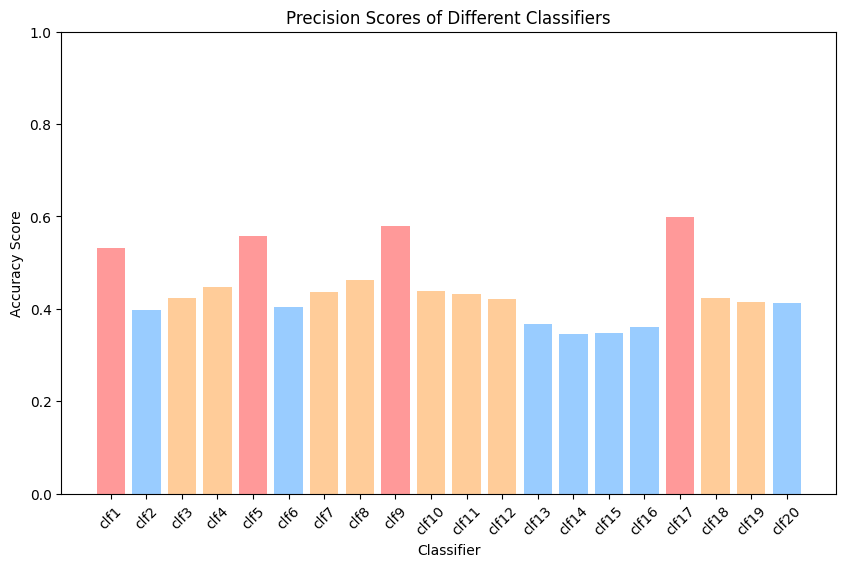

In [44]:
precision_scores = [precision_score(y_true=y_test, y_pred=clf.predict(X_test)) for clf in clfs]
colors = ['#FF9999' if score > 0.5 else '#FFCC99' if score > 0.413 else '#99CCFF' for score in precision_scores]
plt.figure(figsize=(10, 6))
plt.bar(range(1, 21), precision_scores, color=colors)
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Precision Scores of Different Classifiers')
plt.xticks(range(1, 21), [f'clf{i+1}' for i in range(20)], rotation=45)
plt.ylim(0, 1)
plt.show()

In [45]:
for i, clf in enumerate(clfs):
    print(i+1, recall_score(y_true=y_test, y_pred=clf.predict(X_test)))

1 0.4377904898105113
2 0.8145334286735788
3 0.7056667858419735
4 0.6658026456918127
5 0.4644261708973901
6 0.8733464426170897
7 0.7317661780479084
8 0.682248838040758
9 0.5117983553807651
10 0.8636932427601001
11 0.8745977833392921
12 0.8617268501966393
13 0.782713621737576
14 0.8403646764390418
15 0.8441186986056489
16 0.8735252055774043
17 0.4381480157311405
18 0.8812120128709331
19 0.8957811941365749
20 0.8834465498748659


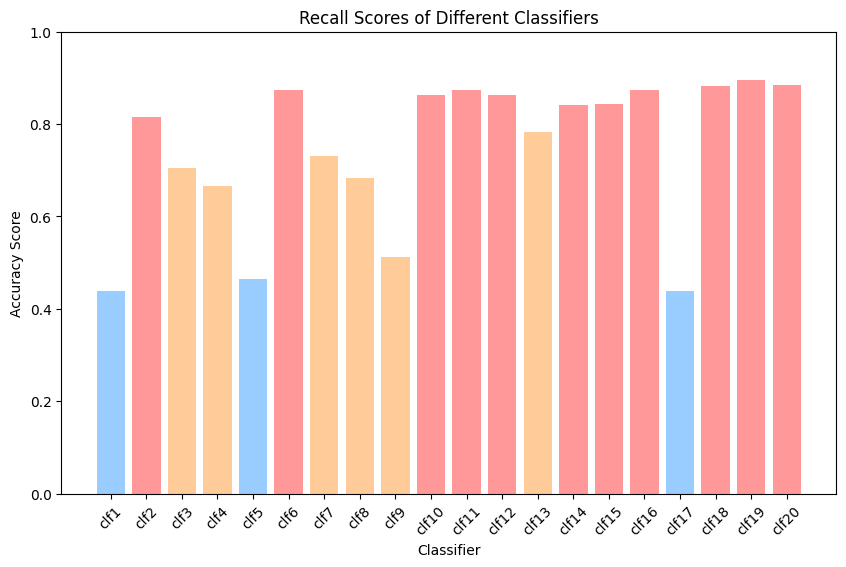

In [46]:
recall_scores = [recall_score(y_true=y_test, y_pred=clf.predict(X_test)) for clf in clfs]
colors = ['#FF9999' if score > 0.79 else '#FFCC99' if score > 0.5 else '#99CCFF' for score in recall_scores]
plt.figure(figsize=(10, 6))
plt.bar(range(1, 21), recall_scores, color=colors)
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Recall Scores of Different Classifiers')
plt.xticks(range(1, 21), [f'clf{i+1}' for i in range(20)], rotation=45)
plt.ylim(0, 1)
plt.show()

In [47]:
for i, clf in enumerate(clfs):
    y_score = clf.predict_proba(X_test)[:, 1]
    print(i+1, roc_auc_score(y_true=y_test, y_score=y_score))

1 0.8237985451577352
2 0.8822329078456849
3 0.8166370403172565
4 0.822731004252411
5 0.9241072593308128
6 0.9436806958156255
7 0.9213069689320544
8 0.9235395736260487
9 0.954845816774341
10 0.9549948908032689
11 0.9550617155033216
12 0.9520527393923894
13 0.9207829988795798
14 0.9204002965119416
15 0.9206290180684801
16 0.9205007026587294
17 0.9542481381088894
18 0.9543016115345783
19 0.9542572621222405
20 0.9530159361878981


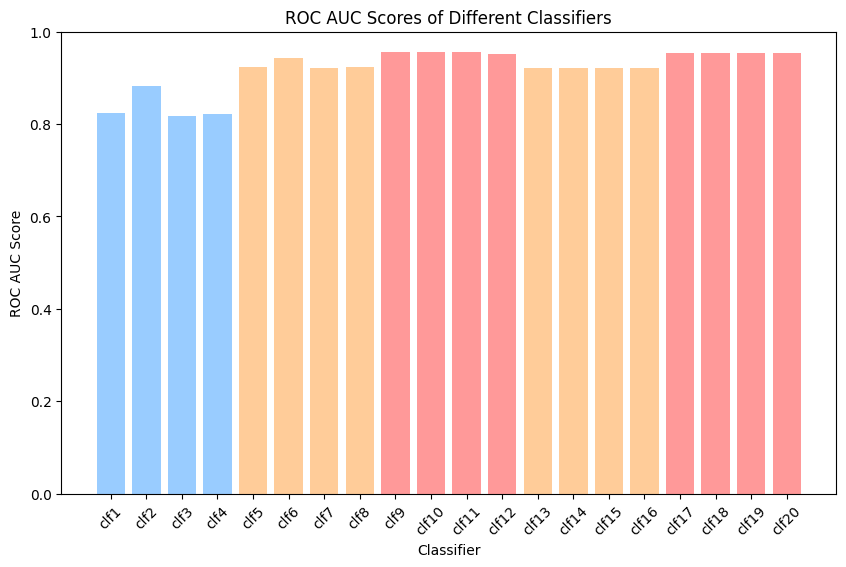

In [48]:
roc_auc_scores = [roc_auc_score(y_true=y_test, y_score=clf.predict_proba(X_test)[:, 1]) for clf in clfs]
colors = ['#FF9999' if score > 0.95 else '#FFCC99' if score > 0.9 else '#99CCFF' for score in roc_auc_scores]
plt.figure(figsize=(10, 6))
plt.bar(range(1, 21), roc_auc_scores, color=colors)
plt.xlabel('Classifier')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Scores of Different Classifiers')
plt.xticks(range(1, 21), [f'clf{i+1}' for i in range(20)], rotation=45)
plt.ylim(0, 1)
plt.show()

In [49]:
for i, clf in enumerate(clfs):
    print(i+1, matthews_corrcoef(y_true=y_test, y_pred=clf.predict(X_test)))

1 0.4465276788725121
2 0.5233407810190824
3 0.5022766965816305
4 0.5020078218439332
5 0.4737771625162028
6 0.5502176901833387
7 0.5215931099230879
8 0.5197792114348702
9 0.5106209333248158
10 0.5762488625499775
11 0.5744523981969262
12 0.5613238949292781
13 0.48547884120078777
14 0.487532163524833
15 0.49070527811561915
16 0.5128290904121288
17 0.48066432125761105
18 0.5708009717613759
19 0.5691099363324738
20 0.5619029833716581


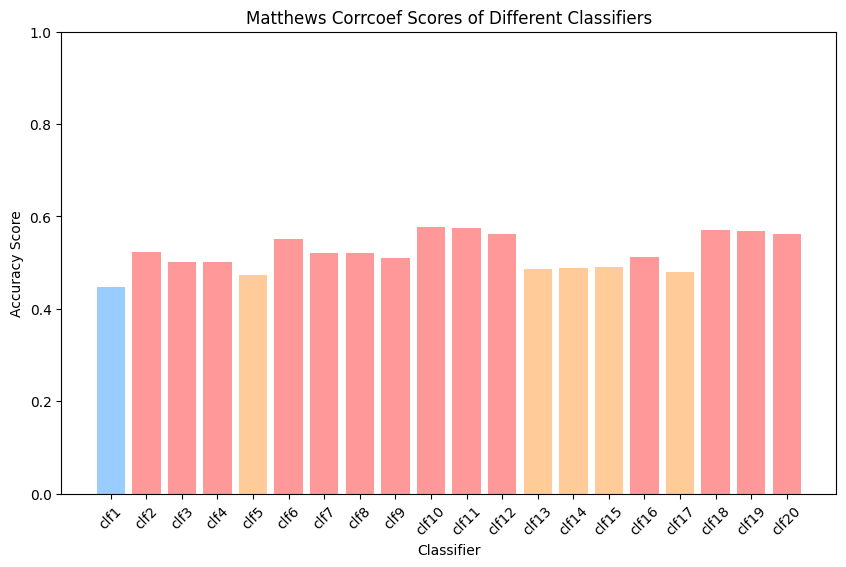

In [50]:
matthews_corrcoefs = [matthews_corrcoef(y_true=y_test, y_pred=clf.predict(X_test)) for clf in clfs]
colors = ['#FF9999' if score > 0.5 else '#FFCC99' if score > 0.45 else '#99CCFF' for score in matthews_corrcoefs]
plt.figure(figsize=(10, 6))
plt.bar(range(1, 21), matthews_corrcoefs, color=colors)
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Matthews Corrcoef Scores of Different Classifiers')
plt.xticks(range(1, 21), [f'clf{i+1}' for i in range(20)], rotation=45)
plt.ylim(0, 1)
plt.show()

In [51]:
for i, clf in enumerate(clfs):
    print(i+1, cohen_kappa_score(y_test, clf.predict(X_test)))

1 0.4440786808265603
2 0.4837865264524053
3 0.48309429836093065
4 0.490167605606464
5 0.47154173802900645
6 0.5020721669314319
7 0.5009308442609358
8 0.5080723802243736
9 0.5095243453144128
10 0.5374058838184339
11 0.532330858175206
12 0.5191878826277617
13 0.4446558869258104
14 0.4317771532758309
15 0.43474531179956777
16 0.45454419494630616
17 0.47401232573034235
18 0.5259803224218806
19 0.5198989702567891
20 0.5141257662703712


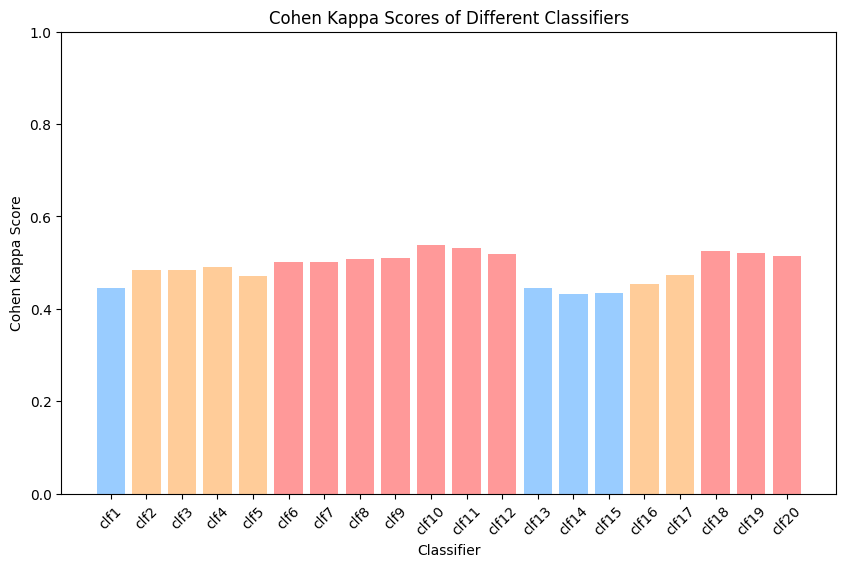

In [52]:
cohen_kappa_scores = [cohen_kappa_score(y_test, clf.predict(X_test)) for clf in clfs]
colors = ['#FF9999' if score > 0.5 else '#FFCC99' if score > 0.45 else '#99CCFF' for score in cohen_kappa_scores]
plt.figure(figsize=(10, 6))
plt.bar(range(1, 21), cohen_kappa_scores, color=colors)
plt.xlabel('Classifier')
plt.ylabel('Cohen Kappa Score')
plt.title('Cohen Kappa Scores of Different Classifiers')
plt.xticks(range(1, 21), [f'clf{i+1}' for i in range(20)], rotation=45)
plt.ylim(0, 1)
plt.show()